# **Project Name**    - Netflix Movies And Tv Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Netflix is a subscription-based streaming service that provides its members with access to a vast library of movies and TV shows. With such a large content catalog, it can be challenging for users to find content that matches their preferences. To address this issue, Netflix uses data analysis and machine learning techniques such as clustering to group their content into similar categories. This approach involves analyzing various characteristics of each title, such as genre, cast, and plot, and using algorithms to identify patterns and similarities.

This project is aimed at conducting a comprehensive analysis of Netflix's extensive library of movies and TV shows, sourced from the Flixable search engine. The primary goal is to categorize these titles into meaningful clusters, with the ultimate aim of enhancing user engagement and reducing subscriber turnover for Netflix, a leading online streaming service with over 220 million subscribers as of the second quarter of 2022.

- Handling null values in the dataset.

- Performing Exploratory Data Analysis (EDA) to gain insights for preventing subscriber churn.

- Creating clusters using attributes like director, cast, country, genre, rating, and description. These attributes were tokenized, preprocessed, and vectorized using TF-IDF vectorizer.

- Reducing the dimensionality of the dataset using PCA to improve performance.

- Employing K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, determining optimal cluster numbers (4 for K-Means, 2 for hierarchical clustering) through various evaluation methods.

- Developing a content-based recommender system using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix.

# **GitHub Link -**

https://github.com/jaysinghparihar11/Netflix_Movies_And_Tv_Shows_Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

Exploratory Data Analysis
Understanding what type content is available in different countries
If Netflix has been increasingly focusing on TV rather than movies in recent years.
Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [137]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from scipy import stats
from wordcloud import WordCloud,STOPWORDS
import string
string.punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import re
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [139]:
# Load Dataset
netflix_dataset = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [140]:
# Dataset First Look
netflix_dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [141]:
# Dataset Rows & Columns count
netflix_dataset.shape

(7787, 12)

### Dataset Information

In [142]:
# Dataset Info
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [143]:
# Dataset Duplicate Value Count
len(netflix_dataset[netflix_dataset.duplicated()])

0

#### Missing Values/Null Values

In [144]:
# Missing Values/Null Values Count
netflix_dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [145]:
netflix_dataset.isnull().sum()/ len(netflix_dataset)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

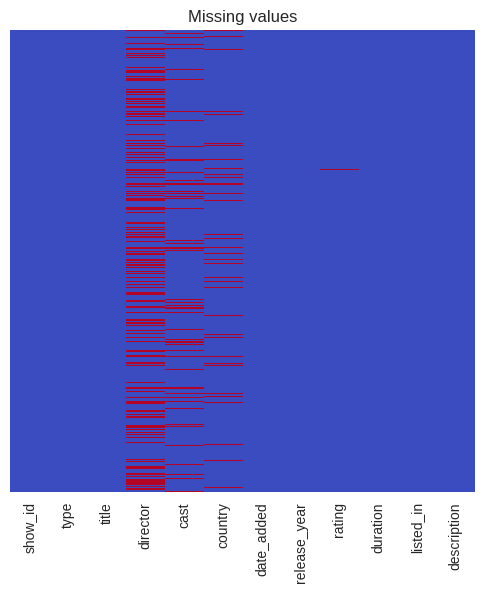

In [146]:
# Visualizing the missing values
missing_values = netflix_dataset.isnull()
plt.figure(figsize = (6,6))
sns.heatmap(missing_values,cmap = 'coolwarm',cbar=False,yticklabels=False)
plt.title('Missing values')
plt.show()

### What did you know about your dataset?

In the given dataset, there are 12 columns and 7787 rows.There are some missing values in the dataset.

## ***2. Understanding Your Variables***

In [147]:
# Dataset Columns
netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [148]:
# Dataset Describe
netflix_dataset.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

1 - show_id: Unique identifier for each movie/show.

2 - type: Indicates whether the entry is a movie or a TV show.

3 - title: Name of the movie or TV show.

4 - director: Name of the director(s) of the movie or TV show.

5 - cast: Names of the actors and actresses featured in the movie or TV show.

6 - country: Country or countries where the movie or TV show was produced.

7 - date_added: Date when the movie or TV show was added to Netflix.

8 - release_year: Year when the movie or TV show was released.

9 - rating: TV rating or movie rating of the movie or TV show.

10 - duration: Length of the movie or TV show in minutes or seasons.

11 - listed_in: Categories or genres of the movie or TV show.

12 - description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [149]:
# Check Unique Values for each variable.
for i in netflix_dataset.columns.tolist():
  print("Unique values in",[i],"is",netflix_dataset[i].nunique())

Unique values in ['show_id'] is 7787
Unique values in ['type'] is 2
Unique values in ['title'] is 7787
Unique values in ['director'] is 4049
Unique values in ['cast'] is 6831
Unique values in ['country'] is 681
Unique values in ['date_added'] is 1565
Unique values in ['release_year'] is 73
Unique values in ['rating'] is 14
Unique values in ['duration'] is 216
Unique values in ['listed_in'] is 492
Unique values in ['description'] is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [269]:
# Write your code to make your dataset analysis ready.
dataset = netflix_dataset.copy()

In [270]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [271]:
dataset[['director','cast']] = dataset[['director','cast']].fillna("Unknown")
dataset['country'].fillna(value = dataset['country'].mode()[0],inplace=True)
dataset['rating'].fillna(value = dataset['rating'].mode()[0],inplace=True)

In [272]:
dataset.dropna(subset=['date_added'],inplace=True)

In [273]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [274]:
dataset["date_added"] = pd.to_datetime(dataset['date_added'])
dataset['day_num'] = dataset['date_added'].dt.day
dataset['year_num'] = dataset['date_added'].dt.year
dataset['month_num']=dataset['date_added'].dt.month
dataset['Month'] = dataset['date_added'].dt.month_name()
dataset['year_num'].astype(int);
dataset['day_num'].astype(int);

In [275]:
dataset.drop('date_added', axis=1, inplace=True)

In [276]:
dataset['country'] = dataset['country'].apply(lambda x: x.split(',')[0])
dataset['listed_in'] = dataset['listed_in'].apply(lambda x: x.split(',')[0])
dataset['duration'] = dataset['duration'].apply(lambda x: int(x.split()[0]))

In [277]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
dataset['target_ages'] = dataset['rating'].replace(ratings)

In [278]:
dataset['type'] = pd.Categorical(dataset['type'])
dataset['target_ages'] = pd.Categorical(dataset['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [279]:
dataset.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil          2020   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore          2011   

  rating  duration               listed_in  \
0  TV-MA         4  International TV Shows   
1  TV-MA        93                  Dramas   
2      R        78           Horror Movies   

                                         description  day_num  year_num  \
0  In a future where the elite inhabit an island ...       14      2020   
1  After a devastating earthquake hits Mexico Cit...       23      2016   
2  When an army recruit is found dead, his fellow...       20      2018   

   month_num     Month target_ages  
0          8    August      Adults  
1         12  December      Adults  
2         12  December      Adults

### What all manipulations have you done and insights you found?

After dealing with the missing values in the dataset, I created new columns called day_num, month_num, year_num, and target_ages.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [161]:
dataset['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [162]:
# Chart - 1 visualization code
Movies_len = dataset[dataset['type'] == 'Movie'].shape[0]
TV_Shows_len = dataset[dataset['type'] == 'TV Show'].shape[0]

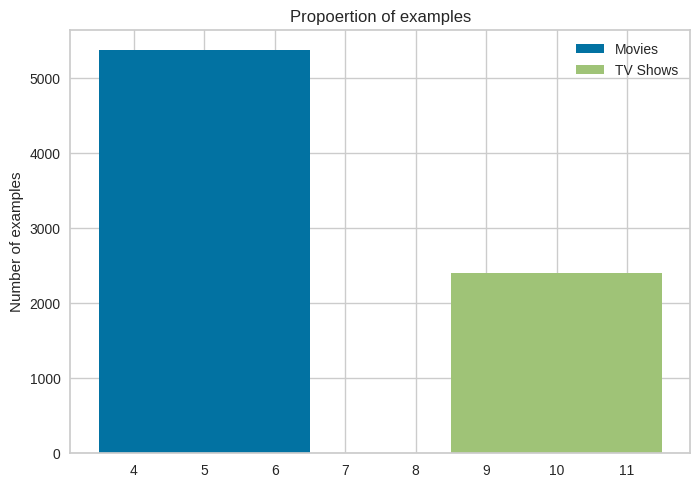

In [163]:
plt.bar(5,Movies_len,3,label="Movies")
plt.bar(10,TV_Shows_len,3,label="TV Shows")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

##### 1. Why did you pick the specific chart?

Barplots are excellent for displaying the frequency or count of categorical variables. They help in understanding the distribution of different categories and allow us for easy comparison between different categories by displaying their respective heights or lengths within a dataset.

##### 2. What is/are the insight(s) found from the chart?

In the column 'type' we have two categories one is Movies and other TV Shows.
And the distribution is showing us there are more Movies than TV Shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Netflix is giving more priority to movies than TV shows. The company may choose to allocate more resources toward producing and acquiring movies in order to attract additional viewers and subscribers.

#### Chart - 2

In [164]:
# Chart - 2 visualization code
Country_df = dataset['country'].value_counts().reset_index()
Country_df.rename(columns = {'index': 'Country_Name'}, inplace=True)
Country_df.rename(columns = {'country': 'Count'}, inplace=True)

<Axes: title={'center': 'Top 5 country Name'}, xlabel='Country_Name', ylabel='Count'>

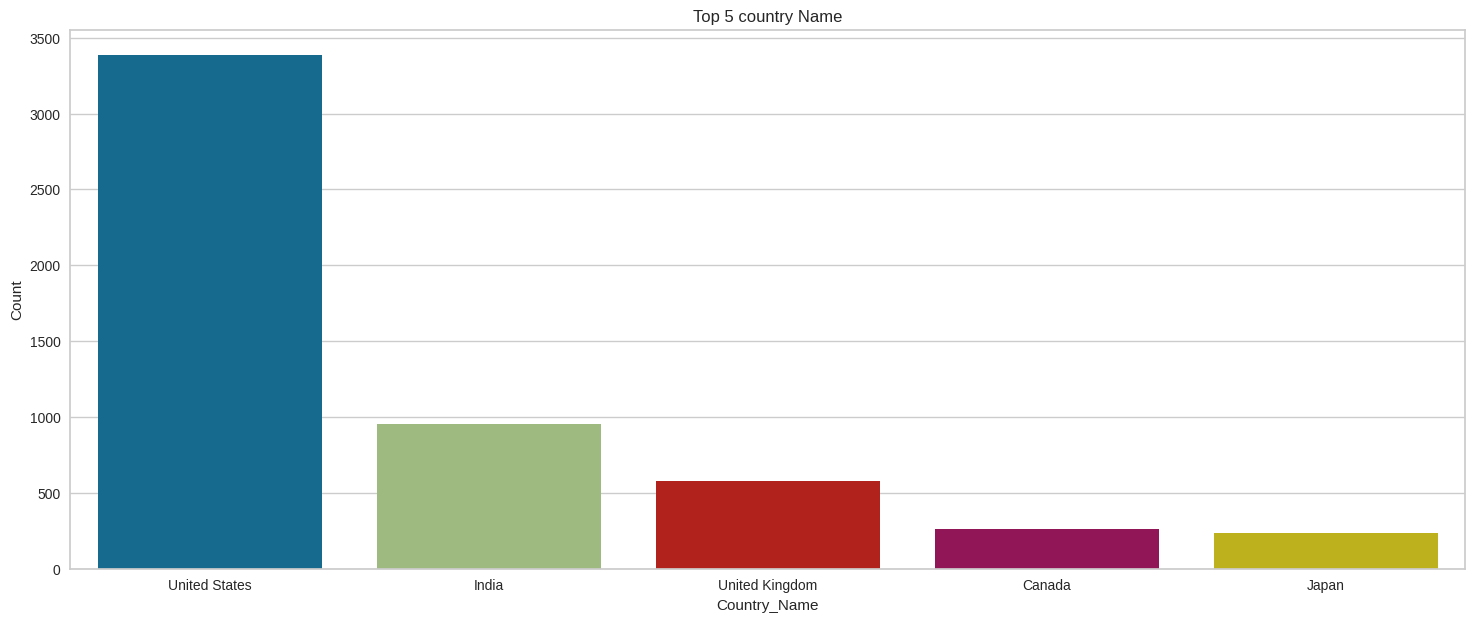

In [165]:
plt.figure(figsize=(18,7))
plt.title('Top 5 country Name')
sns.barplot(x='Country_Name',y='Count',data=Country_df[:5])

##### 1. Why did you pick the specific chart?

"I used a barplot to visualize the top 5 countries with the highest number of movies and TV shows in the dataset. Barplots are excellent for displaying the frequency or count of categorical variables. They help in understanding the distribution of different categories and enable easy comparison between these categories by depicting their respective frequencies or counts within a dataset.

##### 2. What is/are the insight(s) found from the chart?

USA,india,UK,canada,japan are the countries that have the highest number of movies and TV shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can positively impact Netflix's business. Considering the larger audience in India compared to America and other countries, Netflix should focus on expanding its business there to make profits.

#### Chart - 3

In [166]:
tv_show_visualization = dataset[dataset['type']== 'TV Show' ]

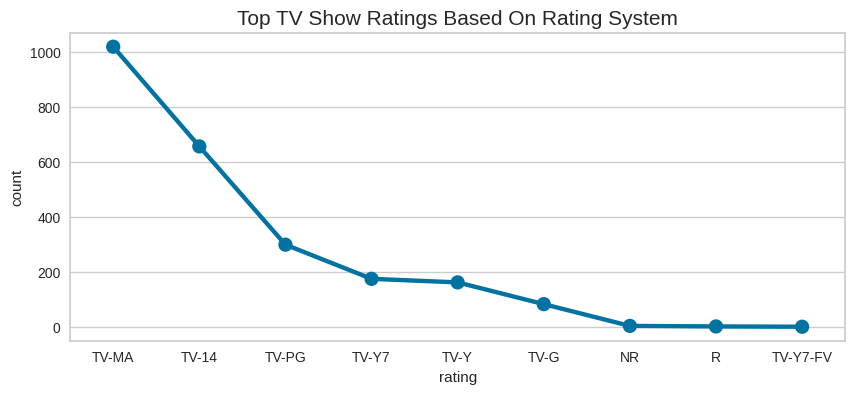

In [167]:
# Chart - 3 visualization code
tv_ratings = tv_show_visualization.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the point plot chart because it effectively displays the distribution of ratings. It enables easy comparison of ratings between different categories, like movies and TV shows, by presenting distinct data points and highlighting clear trends.

##### 2. What is/are the insight(s) found from the chart?

It is showing us the popular rating ranges and potential trends between different categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, they can strategize based on the types of TV show categories that these people want to watch, using this information to guide content creation and increase viewership and revenue.

#### Chart - 4

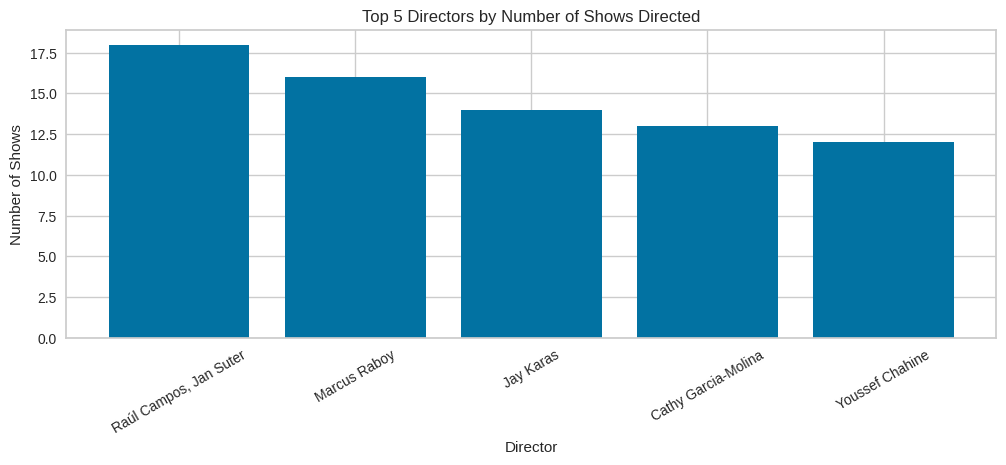

In [168]:
Top5_directors = dataset.loc[dataset['director'] != 'Unknown', 'director'].value_counts().nlargest(5)
plt.figure(figsize=(12,4))
plt.bar(Top5_directors.index, Top5_directors.values)
plt.title('Top 5 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

I used barplot to check the top 5 directors name by Number of Shows Directed.

##### 2. What is/are the insight(s) found from the chart?

1 - Raul Campos, Jan Suter who directed 18 shows.

2 - Marcus Raboy, who directed 16 shows.

3 - Jay Karas, who directed almost 14 shows.

4 - Cathy Garcia-Molina, who directed 13 shows.

5 - Youssef Chahine, who directed 12 shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on insights, you can recommend movies and shows directed by top directors to your audience and generate profit.

#### Chart - 5

In [169]:
# Chart - 5 visualization code
Month_df = dataset['Month'].value_counts().reset_index()
Month_df.rename(columns = {'index': 'Month_Name'}, inplace=True)
Month_df.rename(columns = {'Month': 'Count'}, inplace=True)

<Axes: title={'center': 'Top 5 Month Name'}, xlabel='Month_Name', ylabel='Count'>

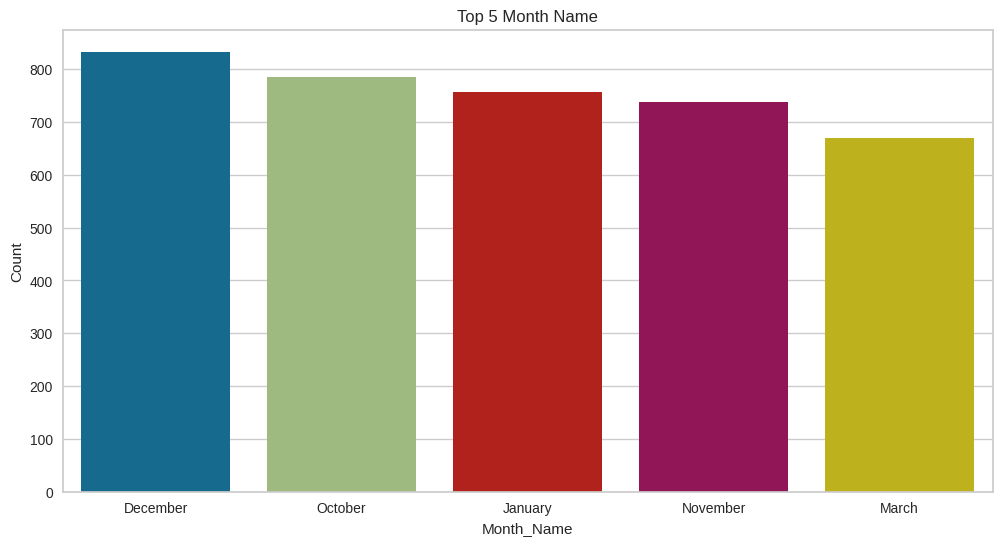

In [170]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Month Name')
sns.barplot(x='Month_Name',y='Count',data=Month_df[:5])

##### 1. Why did you pick the specific chart?

Barplots are excellent for displaying the frequency or count of categorical variables. They help in understanding the distribution of different categories and allow us for easy comparison between different categories by displaying their respective heights or lengths within a dataset

##### 2. What is/are the insight(s) found from the chart?

December, October, January, November, and March are the top 5 months when most movies have been launched on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this data indicates that movies are often launched during these months, possibly because they are peak months.

#### Chart - 6

In [171]:
# Chart - 6 visualization code
rating_df = dataset['rating'].value_counts().reset_index()
rating_df.rename(columns = {'index': 'rating_Netflix'}, inplace=True)
rating_df.rename(columns = {'rating': 'Count'}, inplace=True)

<Axes: title={'center': 'Top 5 rating Movies and TV shows'}, xlabel='rating_Netflix', ylabel='Count'>

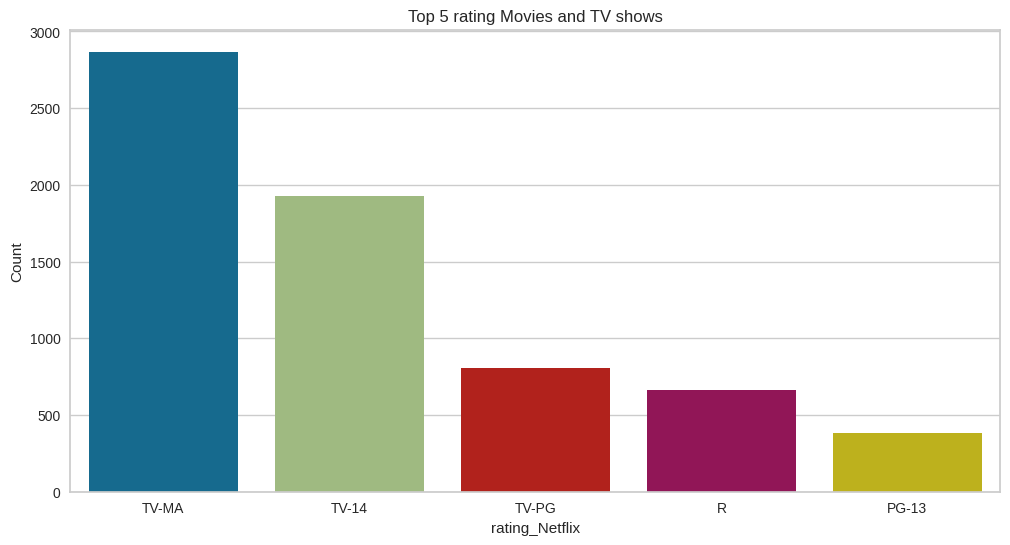

In [172]:
plt.figure(figsize=(12,6))
plt.title('Top 5 rating Movies and TV shows')
sns.barplot(x='rating_Netflix',y='Count',data=rating_df[:5])

##### 1. Why did you pick the specific chart?

Barplots are excellent for displaying the frequency or count of categorical variables. They help in understanding the distribution of different categories and allow us for easy comparison between different categories by displaying their respective heights or lengths within a dataset.

##### 2. What is/are the insight(s) found from the chart?

TV-MA, TV-14, and TV-PG are my top three categories in terms of highest ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on this insights, we can focus on these categories.

#### Chart - 7

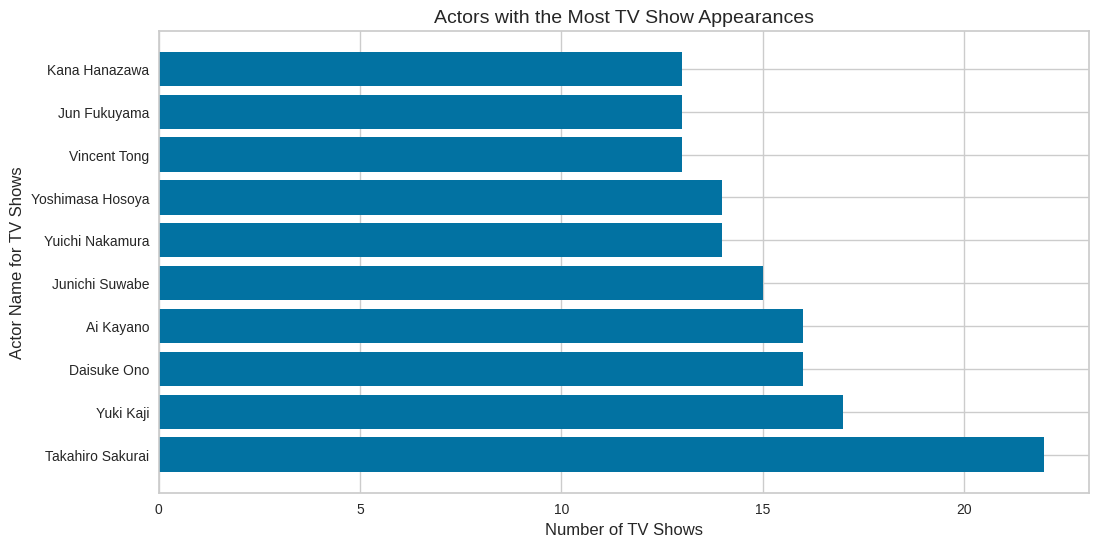

In [173]:
# Chart - 7 visualization code
tv_shows = dataset[(dataset['type'] == 'TV Show') & ~(dataset['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_actors.index, top_actors.values)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

A barplot is a visual representation that uses rectangular bars to display and compare the frequency, count, or distribution of different categories or groups in a dataset. It's particularly effective for showcasing categorical data and making easy comparisons between these categories by representing their counts or frequencies with the heights or lengths of the bars.

##### 2. What is/are the insight(s) found from the chart?

The chart displays the top 10 actors with the highest appearances in Netflix TV shows. It reveals that Takahiro Sakurai has the most appearances, succeeded by Yuki Kaji and Daisuke Ono. These findings offer valuable insights into identifying popular actors who might attract audiences for upcoming TV show releases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because some people want to watch movies and TV shows starring their favorite actors, analyzing the actors is crucial to providing recommendations to the audience.

#### Chart - 8

In [174]:
yearly_movies=dataset[dataset.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=dataset[dataset.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=dataset['release_year'].value_counts().sort_index(ascending=False).head(15)

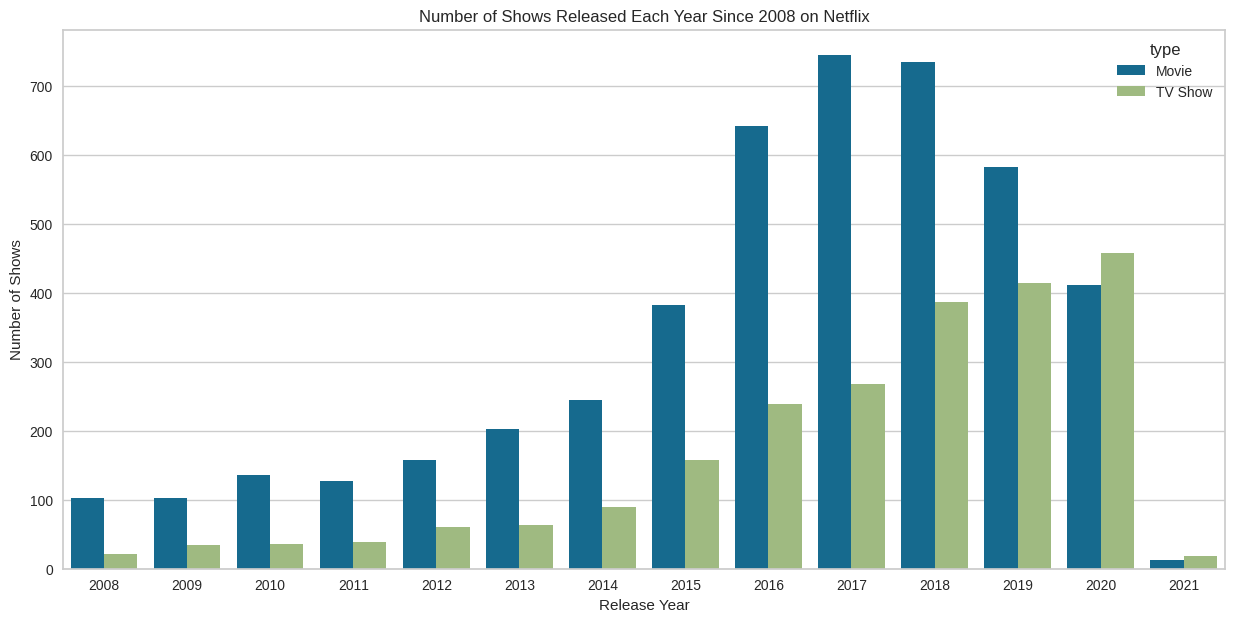

In [175]:
# Chart - 8 visualization code
yearly_growth = dataset[dataset['release_year'] >= 2008]
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data = yearly_growth, hue='type', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to check the trend of the number of shows released each year since 2008, and it also shows the difference in the number of movies and TV shows released each year.

##### 2. What is/are the insight(s) found from the chart?

The annual release count for TV shows has seen a consistent uptrend since 2008. While the number has remained relatively steady with occasional fluctuations, the disparity between movie and TV show releases has widened over time, signaling a shift toward greater production of original movies on Netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can bring a positive impact to the business. After 2016, the number of shows has been continuously increasing.

#### Chart - 9

In [176]:
Tv_shows = dataset[dataset['type']=='TV Show']
movies = dataset[dataset['type']=='Movie']

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

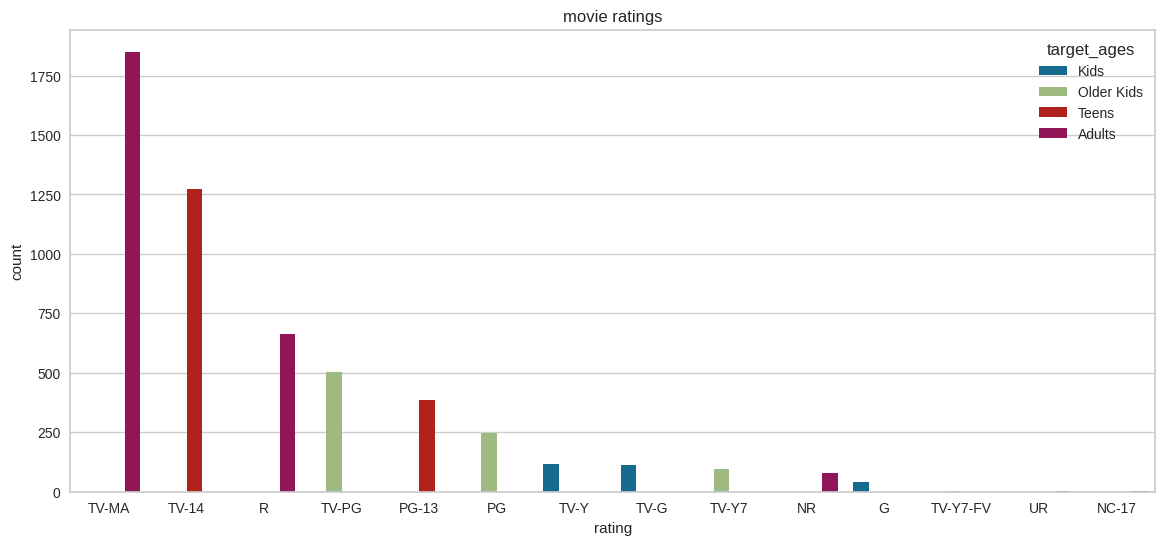

In [177]:
# Chart - 9 visualization code
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

##### 1. Why did you pick the specific chart?

Count plots are a type of visualization that display the frequency or count of observations within categorical data

##### 2. What is/are the insight(s) found from the chart?

These lines indicate the movie ratings for target_ages. TV-MA and TV-14 have the highest ratings, belonging to the adults and teens categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we can recommend content to them based on these insights, keeping them continuously engaged and generating profit.

#### Chart - 10

In [178]:
df_movies = dataset[dataset['type'] == 'Movie' ]

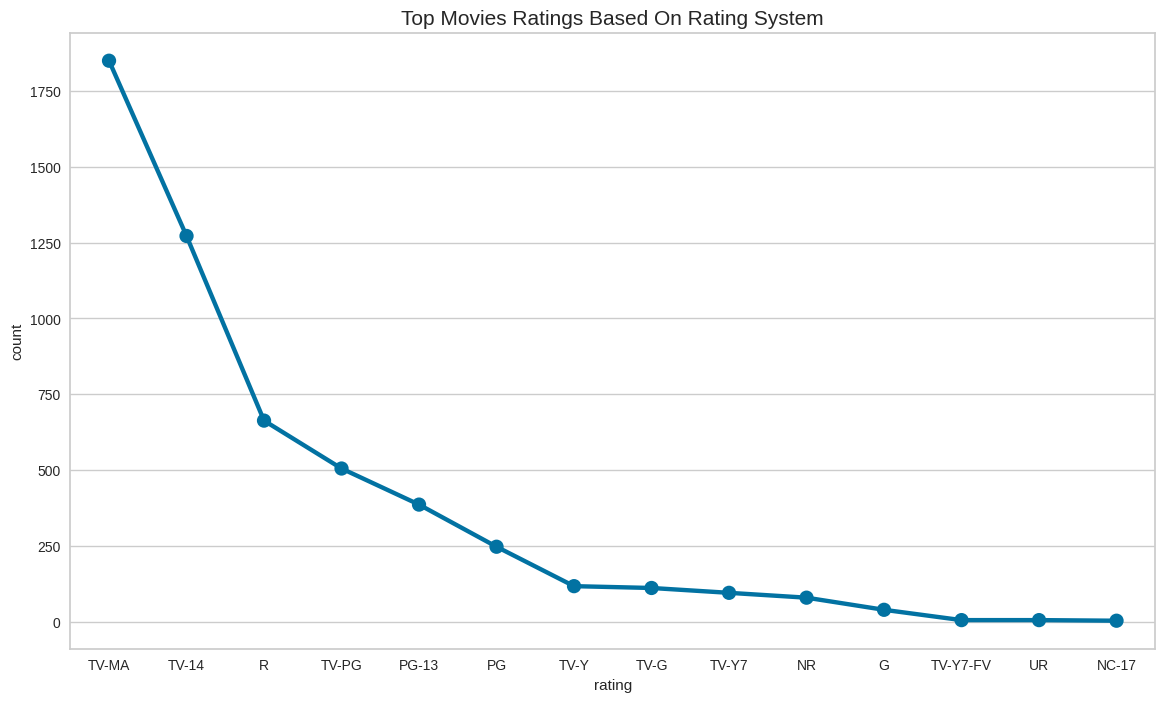

In [179]:
# Chart - 10 visualization code
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (14,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movies Ratings Based On Rating System',size='15')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the point plot chart because it effectively displays the distribution of ratings. It enables easy comparison of ratings between different categories, like movies and TV shows, by presenting distinct data points and highlighting clear trends.

##### 2. What is/are the insight(s) found from the chart?

It is showing us the popular rating ranges and potential trends between different categories.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, they can strategize based on the types of movies categories that these people want to watch, using this information to guide content creation and increase viewership and revenue.

#### Chart - 11

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

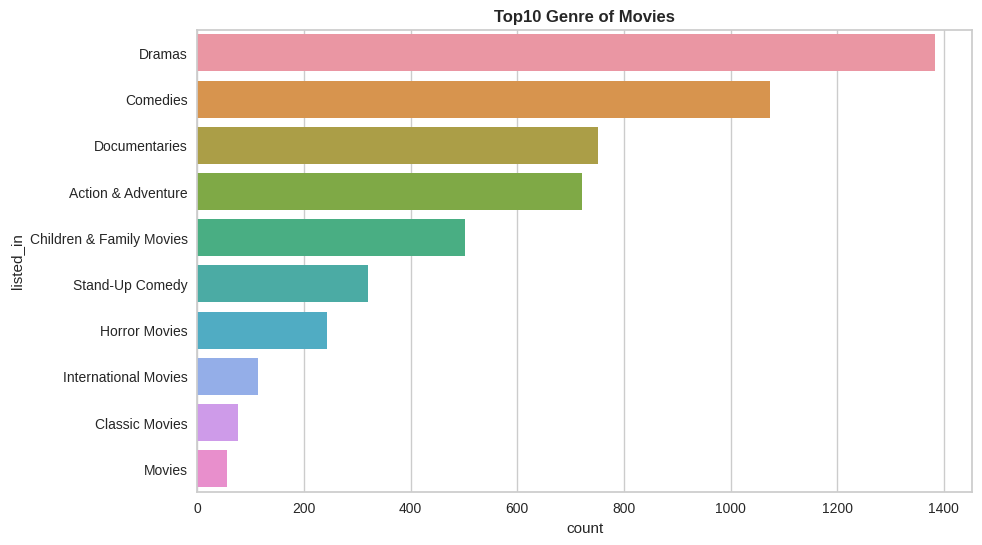

In [180]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

A countplot is a type of categorical plot used in EDA to display the counts of observations in each categorical bin or category.

##### 2. What is/are the insight(s) found from the chart?

Dramas, comedies, documentaries, action and adventure, and children and families are our top 5 genres in movies, where most of the movies are listed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can have a positive impact on the business, as it shows that most people would like to watch content in these genres. We can suggest more content in these genres.

#### Chart - 12

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

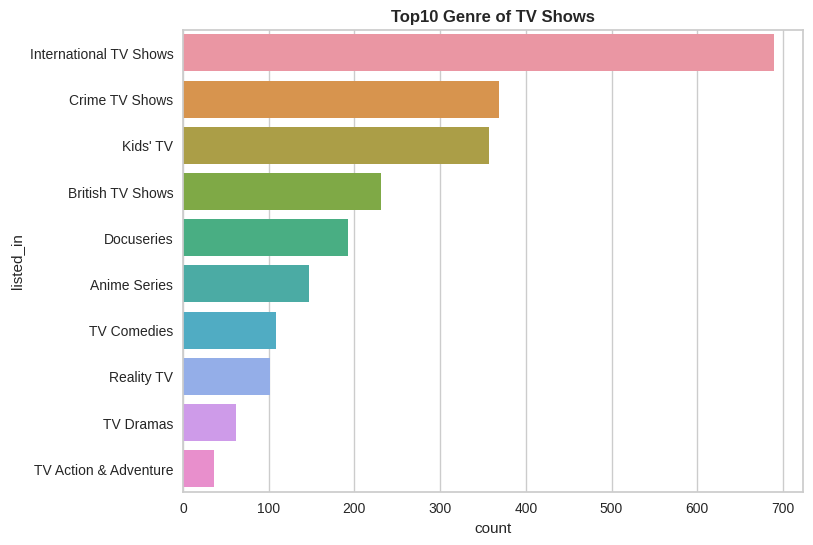

In [181]:
# Chart - 12 visualization code
plt.figure(figsize=(8,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=Tv_shows['listed_in'],data=Tv_shows,order=Tv_shows['listed_in'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

I used a countplot, a type of categorical plot used in EDA, to display the counts of observations in each categorical bin or category.

##### 2. What is/are the insight(s) found from the chart?

International tV Shows,Crime TV Shows,kids TV Shows,British TV Shows and Docuseries are our top 5 genres in TV Shows, where most of the movies are listed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can have a positive impact on the business, as it shows that most people would like to watch content in these genres. We can suggest more content in these genres.

#### Chart - 13

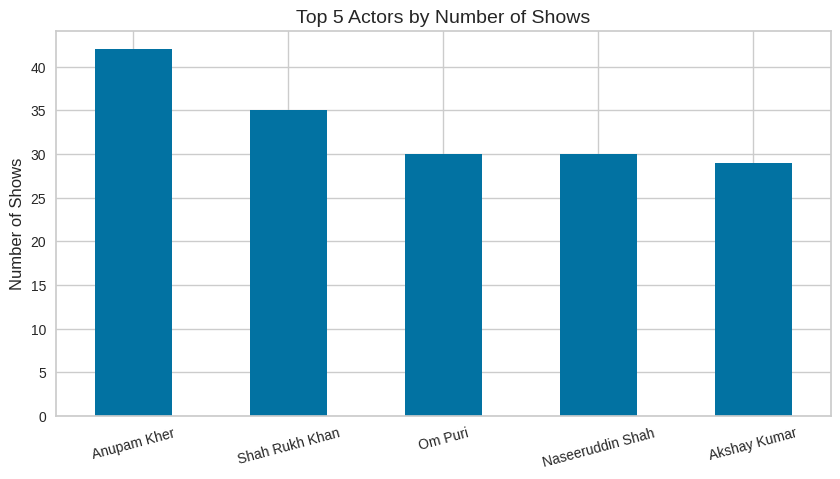

In [182]:
# Chart - 13 visualization code
dataset_ = dataset[~(dataset['cast']=='Unknown')]
split_cast = dataset_['cast'].str.split(', ', expand=True)
cast_values = split_cast.stack().reset_index(level=1, drop=True)
top_5_actors = cast_values.value_counts().nlargest(5)
top_5_actors.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Actors by Number of Shows', fontsize=14)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=15)
plt.show()

##### 1. Why did you pick the specific chart?

I used barplot to check the top 5 directors name by Number of Shows Directed.

##### 2. What is/are the insight(s) found from the chart?

1 - Anupam Kher, who has starred in more than 40 shows

2 - . Shah Rukh Khan, who has appeared in 35 shows.

3 - Om Puri who has appeared 30 shows.

4 - Naseeruddin Shah, also featured in 30 shows.

5 - Akshay Kumar, with appearances in almost 28 shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,because By knowing the most popular actors on the platform, Netflix can acquire or produce content that features these actors, which could increase the number of viewership and engagement on their platform.

#### Chart - 14 - Correlation Heatmap

In [183]:
corr = dataset.corr()

<ipython-input-183-6013ac24ef44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

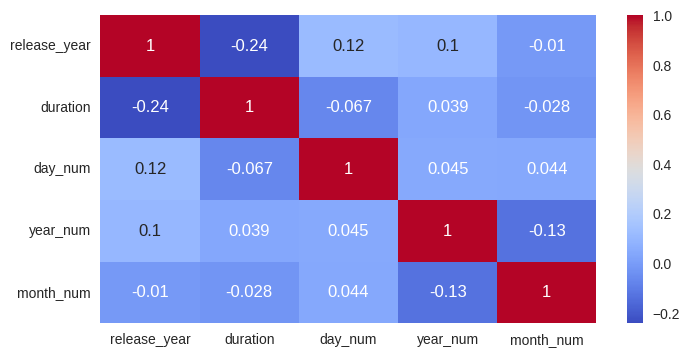

In [184]:
# Correlation Heatmap visualization code'
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are graphical representations of data where values are depicted using color gradients.Heatmaps can display relationships between two sets of data by using color intensity to represent the strength or magnitude of that relationship.They are useful for comparing multiple variables or categories simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Release_year is negatively correlated with duration and month_num."
"Duration is negatively correlated with day_num and month_num.

#### Chart - 15 - Pair Plot

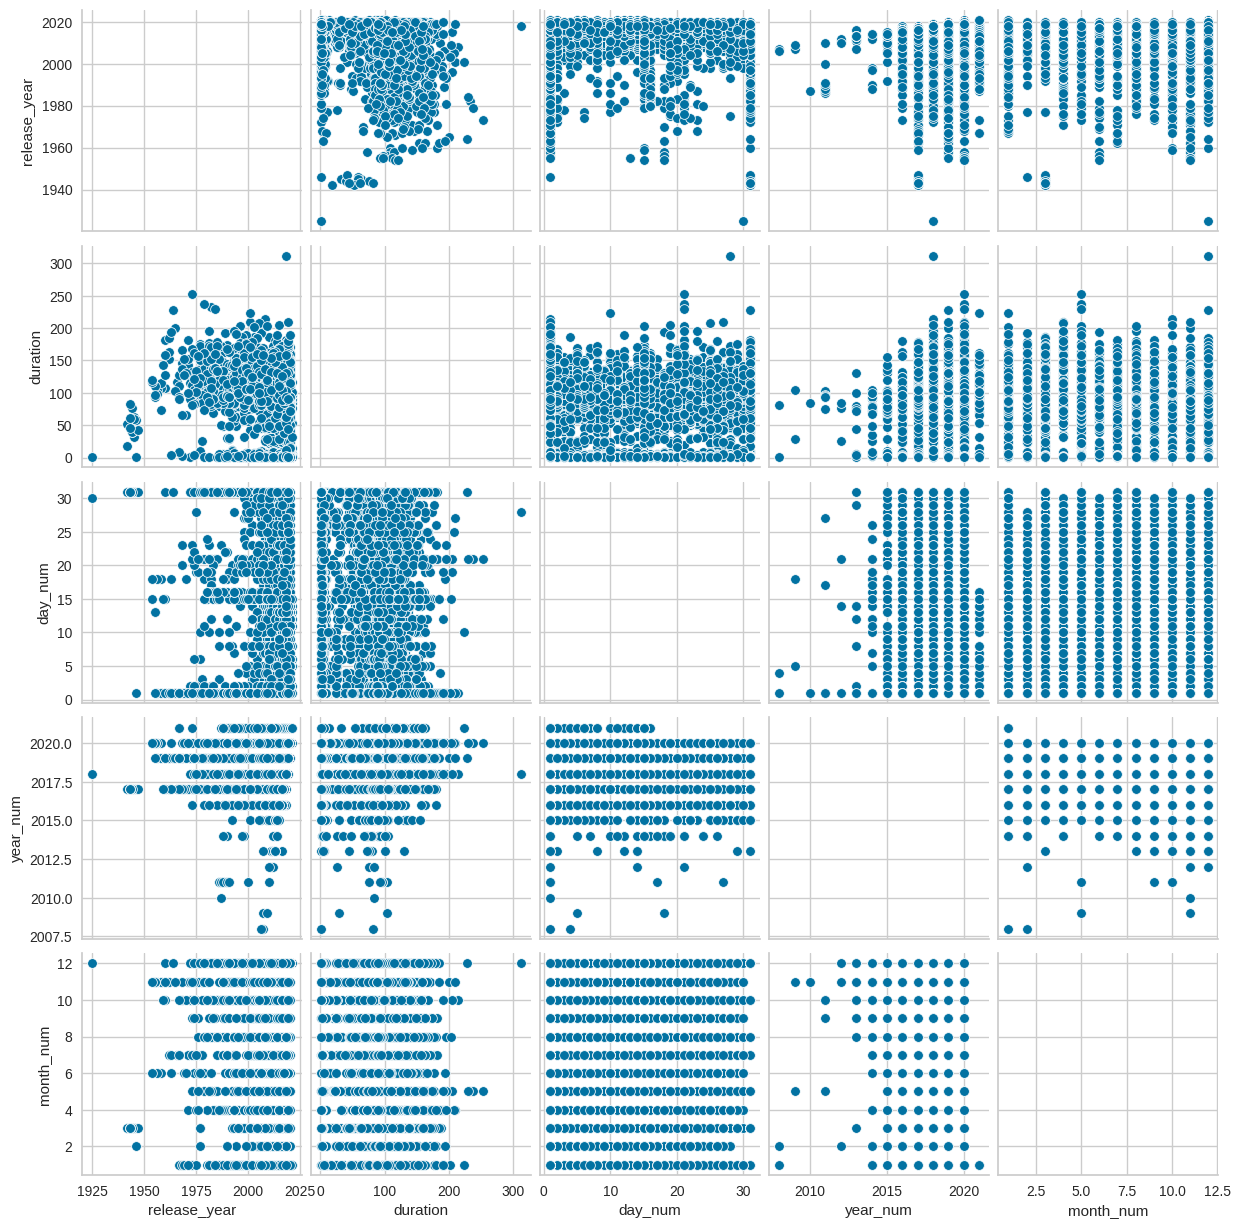

In [185]:
# Pair Plot visualization code
sns.pairplot(dataset,diag_kind='Kde')

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that enables the exploration of relationships between all pairs of variables in a dataset. It is a valuable tool for data analysis as it facilitates a quick understanding of how variables in a dataset relate to each other.

Therefore, we utilized a pair plot to analyze the data patterns and relationships between features. It functions similarly to a correlation map, but it provides a graphical representation, allowing for a visual understanding of these relationships.

##### 2. What is/are the insight(s) found from the chart?

 We can see the range and distribution of each variable from the diagonal plots. The distribution of the duration of movies and TV shows seems to be concentrated in certain ranges.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement : The average number of movies on Netflix in the United States is significantly different from the average number of movies on Netflix in India.

Null Hypothesis (H0): There is no significant difference in the release years between movies produced in the United States and movies produced in India.

Alternative Hypothesis (Ha): There is a significant difference in the release years between movies produced in the United States and movies produced in India.

#### 2. Perform an appropriate statistical test.

In [280]:
new_data = dataset.copy()

In [281]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter the movies DataFrame to create two new DataFrames:
# One containing only movies produced in the United States, and one containing only movies produced in India
us_movie_df = new_data[new_data.country == 'United States']
india_movie_df = new_data[new_data.country == 'India']

# Perform a two-sample t-test between the release years of the two groups of movies
t_statistic, p_value = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Print the calculated t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the calculated p-value is less than the significance level
if p_value < alpha:
    # If the p-value is less than the significance level, reject the null hypothesis
    print("Reject Null Hypothesis: There is a significant difference in release years between movies produced in the United States and India.")
else:
    # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
    print("Fail to Reject Null Hypothesis: No significant difference in release years between movies produced in the United States and India.")

# Deleting the temporary dataframes we obtained to calculate the alpha value
del us_movie_df
del india_movie_df

T-Statistic: 5.727073330819272
P-Value: 1.2288137874624823e-08
Reject Null Hypothesis: There is a significant difference in release years between movies produced in the United States and India.


##### Which statistical test have you done to obtain P-Value?

The statistical test I used to obtain the p-value in this case is the is two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I opted for the two-sample t-test for this analysis because it's adept at comparing the means of two independent samples. In this instance, we're working with distinct sets of movie data from Netflix for the United States and India, aiming to discern any notable difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [282]:
# Perform Statistical Test to obtain P-Value
movie_durations = new_data[new_data['type'] == 'Movie']['duration']
tv_show_durations = new_data[new_data['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the two-sample t-test. This test was chosen because we are comparing the means of two independent samples (movie durations and TV show durations), and we want to determine whether the difference between the sample means is statistically significant or could have occurred by chance.

##### Why did you choose the specific statistical test?

The two-sample t-test relies on several assumptions: normal distribution within samples, independent samples, and potentially unequal variances between the two groups being compared. In our case, we made the assumption that the duration of movies and TV shows on Netflix follows a normal distribution and that the samples are independent. Additionally, we considered the possibility of unequal variances between movie and TV show durations, considering the distinct nature of their content.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 3: There is a significant difference between the proportions of Movies and TV Shows.

Null Hypothesis (H0): The proportion of movies in the dataset is equal to the proportion of TV shows.

Alternative Hypothesis (H1): The proportion of movies in the dataset is greater than the proportion of TV shows.

#### 2. Perform an appropriate statistical test.

In [283]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest
n_movies = new_data[new_data['type'] == 'Movie'].count()['type']
n_tv_shows = new_data[new_data['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(new_data), len(new_data)]  # Total number of observations in the DataFrame

# Perform a z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results of the z-test
print('z-statistic:', z_stat)
print('p-value:', p_val)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_val < alpha:
    print('Reject Null Hypothesis: There is a significant difference between the proportions of Movies and TV Shows.')
else:
    print('Fail to Reject Null Hypothesis: There is no significant difference between the proportions of Movies and TV Shows.')

z-statistic: 47.74059011958195
p-value: 0.0
Reject Null Hypothesis: There is a significant difference between the proportions of Movies and TV Shows.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Z-test for proportions. This test is used to compare the proportions of two independent groups and determine if there is a significant difference between them. In this case, the proportions being compared are the proportions of movies and TV shows in the dataset.

##### Why did you choose the specific statistical test?

I selected the Z-test for proportions in this specific scenario due to the comparison between two proportions (movies and TV shows) within a sizable dataset. The Z-test is fitting for larger sample sizes, assuming a normal distribution for the sampling distribution of proportions. Considering the categorical nature of the data (movies vs. TV shows) and our aim to ascertain a significant distinction in their proportions, the Z-test stands as a suitable choice. Moreover, it proves valuable when prior knowledge about the population proportion exists (in this case, assuming no difference) and we aim to assess whether the observed data significantly deviates from this assumption.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [284]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_num         0
year_num        0
month_num       0
Month           0
target_ages     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used isnull().sum() to identify null values in the data because this technique shows us if there are any null values present in your dataset or not.

### 2. Handling Outliers

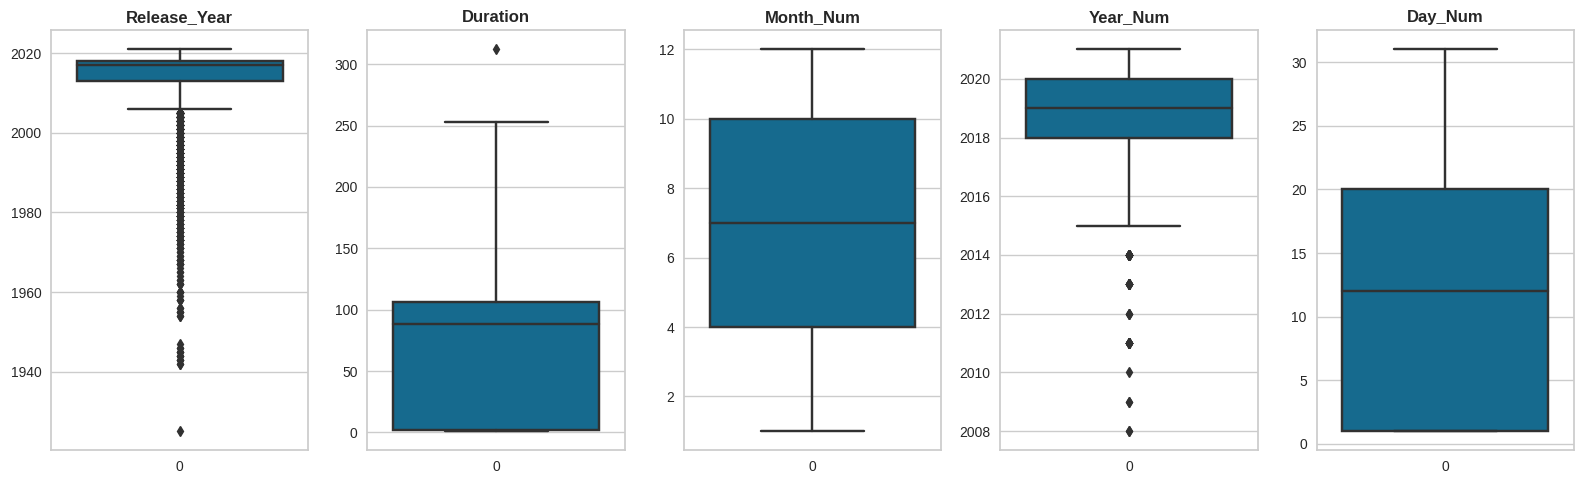

In [285]:
# Handling Outliers & Outlier treatments
continous_value_feature= ["release_year","duration","month_num","year_num","day_num"]

plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


In [286]:
column_to_check = ["release_year","duration","month_num","year_num","day_num"]

In [287]:
percentile_25 = dataset[column_to_check].quantile(0.25)
percentile_75 =  dataset[column_to_check].quantile(0.75)

In [288]:
iqr = percentile_75 - percentile_25

In [289]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [290]:
dataset[column_to_check] = np.where(
    dataset[column_to_check] > upper_limit,
    upper_limit,
    np.where(
        dataset[column_to_check] < lower_limit,
        lower_limit,
        dataset[column_to_check]

    )
)

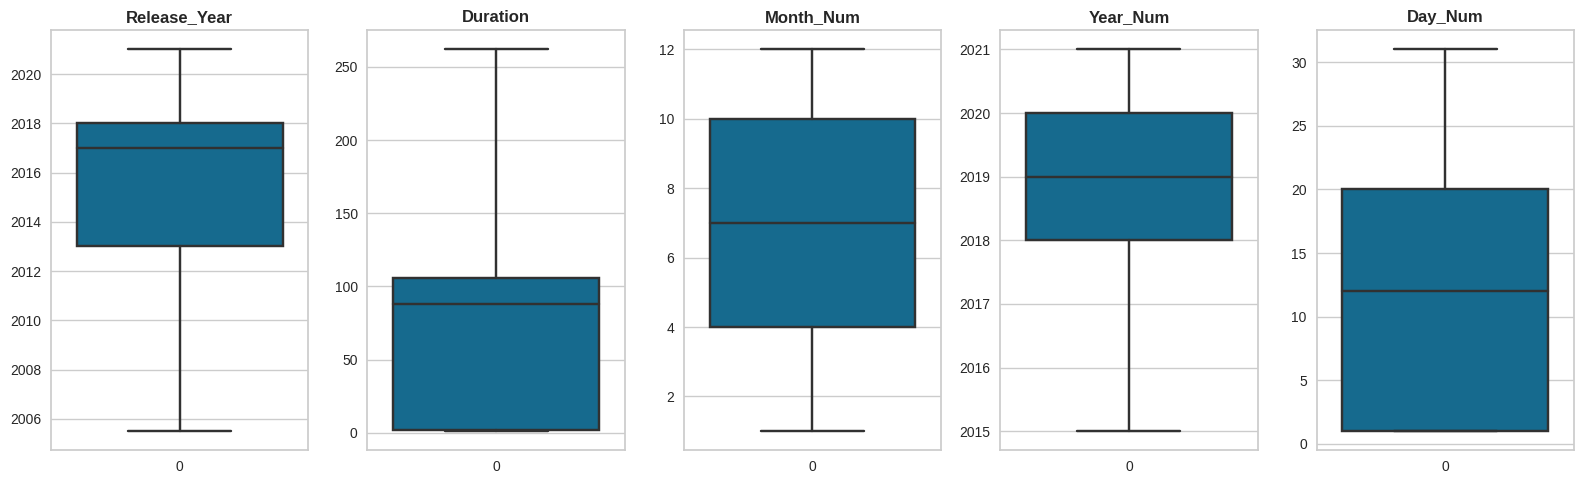

In [291]:
continous_value_feature= ["release_year","duration","month_num","year_num","day_num"]

plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here, I used the IQR method and Capping method, capping outliers up to the 75th percentile. Beyond that, outliers were converted to the upper limit value. After applying the IQR method, all the outliers have been removed.

### 3. Categorical Encoding

In [292]:
# Encode your categorical columns
dataset['movie'] = dataset['type'].apply(lambda x: 1 if x=='Movie' else 0)

In [293]:
dataset['tv_show'] = dataset['type'].apply(lambda x: 0 if x=='Movie' else 1)

In [294]:
dataset.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I created two separate new columns.

1 - movie

2 - tv_show

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [295]:
# Expand Contraction
dataset['new_var'] =(dataset['description'].astype(str) + ' ' +
                  dataset['listed_in'].astype(str)   + ' ' +
                  dataset['rating'].astype(str)      + ' ' +
                  dataset['cast'].astype(str)        + ' ' +
                  dataset['country'].astype(str))

In [296]:
dataset.new_var[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows TV-MA João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil'

#### 2. Lower Casing

In [297]:
# Lower Casing
dataset['Lower_Casing']= dataset['new_var'].str.lower()

In [298]:
dataset.Lower_Casing[0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows tv-ma joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil'

#### 3. Removing Punctuations

In [299]:
# Remove Punctuations
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [300]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [301]:
dataset['cleaned_text'] = dataset['Lower_Casing'].apply(remove_punctuation)

In [302]:
dataset.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tvma joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil'

#### 4. Removing URLs & Removing words and digits contain digits.

In [303]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
  url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
  text = re.sub(url_number_pattern,'', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  return text

In [304]:
dataset['cleaned_text']= dataset['cleaned_text'].apply(remove_urls)

In [305]:
dataset.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor international tv shows tvma jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi brazil'

#### 5. Removing Stopwords & Removing White spaces

In [306]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [307]:
dataset['removed_stopwords'] = dataset['cleaned_text'].apply(remove_stopwords)
dataset.removed_stopwords[0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tvma jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

In [308]:
# Remove White spaces
def remove_whitespaces(text):
    cleaned_text = text.strip()
    return cleaned_text

In [309]:
dataset['remove_whitespaces'] = dataset['removed_stopwords'].apply(remove_whitespaces)
dataset['remove_whitespaces'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: remove_whitespaces, dtype: object

#### 6. Rephrase Text

In [209]:
# Rephrase Text

#### 7. Tokenization

In [310]:
# Tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [311]:
dataset['tokenized'] = dataset['remove_whitespaces'].apply(tokenize_text)

In [312]:
dataset['tokenized'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized, dtype: object

#### 8. Text Normalization

In [313]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
wordnet  = WordNetLemmatizer()
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [314]:
dataset['tokenized'] = dataset['tokenized'].apply(lemmatizing_sentence)

In [315]:
dataset.tokenized[0]

'future elite inhabit island paradise far crowded slum get one chance join saved squalor international tv show tvma jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

##### Which text normalization technique have you used and why?

I have used Lemmatization that helps in standardizing words so that different forms of the same word are treated as one.This process aids in reducing the dimensionality of the data by consolidating words with similar meanings.

#### 9. Part of speech tagging

In [316]:
# POS Taging
dataset['pos_tags'] = dataset['tokenized'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

In [267]:
dataset.head(3)

show_id  title           director  \
0      s1     3%            Unknown   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   

                                                cast    country  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil          2020   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore          2011   

  rating  duration               listed_in  \
0  TV-MA         4  International TV Shows   
1  TV-MA        93                  Dramas   
2      R        78           Horror Movies   

                                         description  ...  tv_show  \
0  In a future where the elite inhabit an island ...  ...        1   
1  After a devastating earthquake hits Mexico Cit...  ...        0   
2  When an army recruit is found dead, his fellow...  ...        0   

                                             new_var  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   

                                        Lower_Casing  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead, his fellow...   

                                        cleaned_text  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   

                                   removed_stopwords  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   

                                  remove_whitespaces  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   

                                           tokenized  \
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...   
1  [(devastating, VBG), (earthquake, NN), (hit, V...   
2  [(army, NN), (recruit, NN), (found, VBN), (dea...   

                                            pos_tags kmeans_cluster  \
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...              0   
1  [(devastating, VBG), (earthquake, NN), (hit, V...              0   
2  [(army, NN), (recruit, NN), (found, VBN), (dea...              0   

  agglomerative_cluster  
0                     0  
1                     0  
2                     0  

[3 rows x 26 columns]

#### 10. Text Vectorization

In [317]:
# Vectorizing Text
tfidfv = TfidfVectorizer(max_features=30000)
x = tfidfv.fit_transform(dataset['tokenized'])
x.shape

(7777, 30000)

In [318]:
x.shape

(7777, 30000)

In [319]:
X = x.toarray()

##### Which text vectorization technique have you used and why?

I used TfidfVectorizer technique that helps in tasks like clustering or topic modeling, where it's essential to represent text data numerically while considering the importance of words within individual documents and across the entire corpus.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [221]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [222]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Feature selection is not required here.

##### Which all features you found important and why?

Feature selection is not required here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [223]:
# Transform Your data

### 6. Data Scaling

In [224]:
# Scaling your data

##### Which method have you used to scale you data and why?

Data scaling is not required here.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I used principal component analysis because it  transform high-dimensional data into a lower-dimensional space while preserving as much variance or information as possible.

In [320]:
# DImensionality Reduction (If needed)
n_components = 10
pca = PCA(n_components = n_components)
pca.fit_transform(x.toarray())
Explained_Variance = pca.explained_variance_ratio_

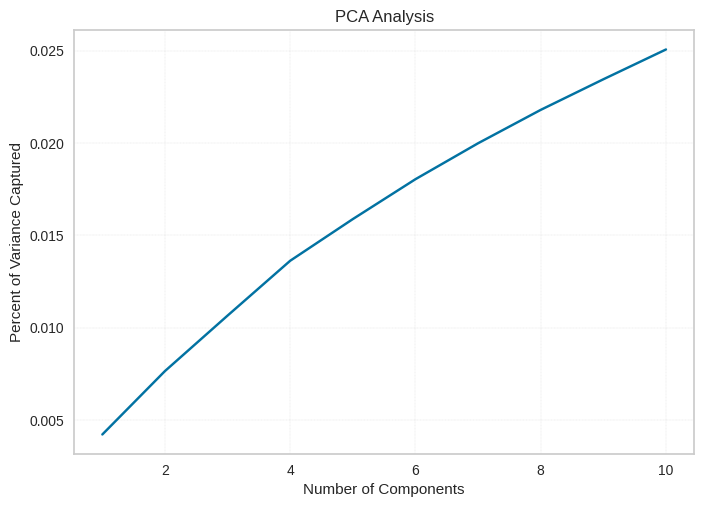

In [321]:
fig, ax = plt.subplots()
ax.plot(range(1, len(Explained_Variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle = '--', linewidth = 0.2)
plt.show()

In [322]:
svd = TruncatedSVD()
x_svd = svd.fit_transform(X)

# Calculate the number of components needed for 95% variance
explained_variance = svd.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
n_components = np.argmax(cumulative_variance >= 0.95) + 1

svd_tuned = TruncatedSVD(n_components=n_components)

# Fitting and transforming the model
X_transformed_Text = svd_tuned.fit_transform(x)

X_transformed_Text.shape

(7777, 1)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used principal component analysis because it transform high-dimensional data into a lower-dimensional space while preserving as much variance or information as possible.

### 8. Data Splitting

In [228]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Not required.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Dataset is not Imbalanced.


In [229]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

K-means aims to minimize the within-cluster sum of squares (WCSS) or inertia, which measures the sum of squared distances between data points and their assigned centroids. The algorithm strives to create clusters where the data points within each cluster are close to the centroid and distinct from data points in other clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

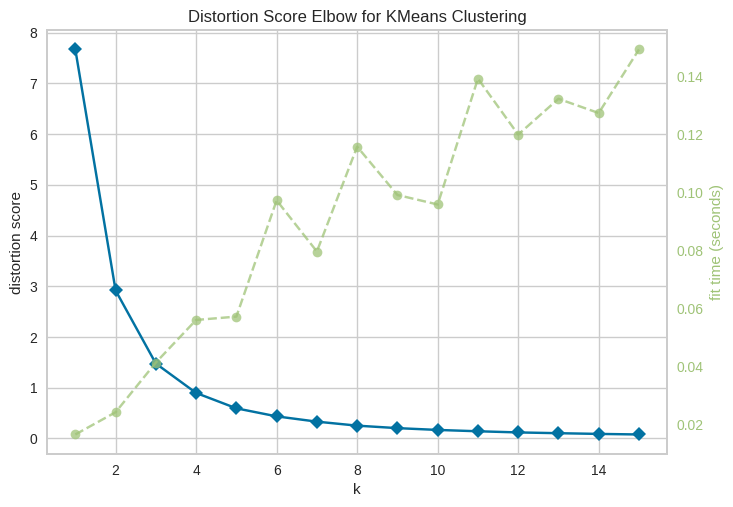

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [323]:
# ML Model - 1 Implementation
kmean_ = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmean_, k=(1,16),locate_elbow=False)

# Fit the Algorithm
visualizer.fit(X_transformed_Text)

# Predict on the model
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

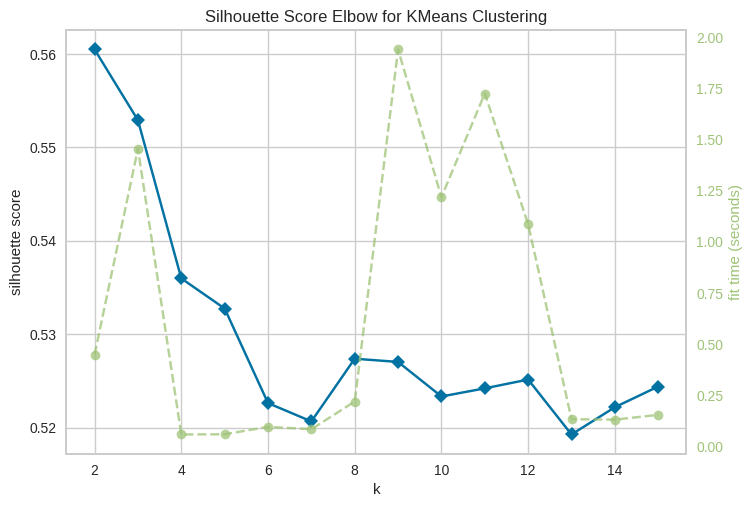

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [324]:
visualizer = KElbowVisualizer(kmean_, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)
visualizer.fit(X_transformed_Text)
visualizer.show()

In [325]:
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(X_transformed_Text)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, Silhouette score=0.001052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, Silhouette score=-0.000040


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, Silhouette score=-0.000931


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, Silhouette score=-0.001311


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, Silhouette score=-0.001927


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


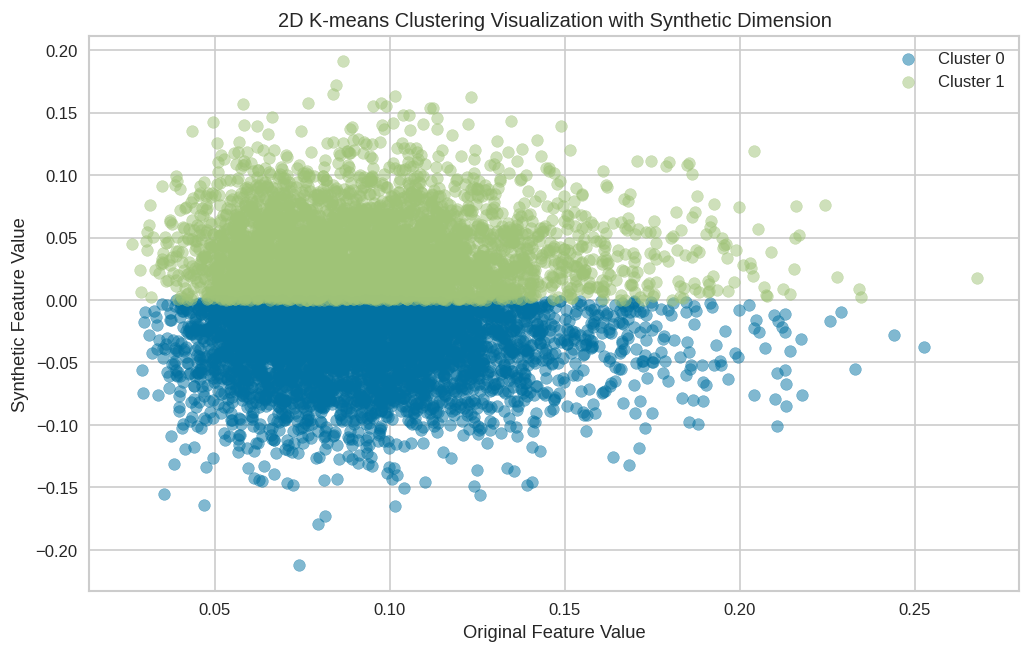

In [326]:
synthetic_dimension = np.random.normal(0, 0.05, size=X_transformed_Text.shape)  # adding random noise
x_augmented = np.hstack((X_transformed_Text, synthetic_dimension.reshape(-1, 1)))

# Re-run K-means clustering on the augmented data
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
labels = kmeans.fit_predict(x_augmented)

# Plotting the results in a 2D scatter plot
plt.figure(figsize=(10, 6), dpi=120)
unique_labels = np.unique(labels)
for i in unique_labels:
    plt.scatter(x_augmented[labels == i, 0], x_augmented[labels == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.title('2D K-means Clustering Visualization with Synthetic Dimension')
plt.xlabel('Original Feature Value')
plt.ylabel('Synthetic Feature Value')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


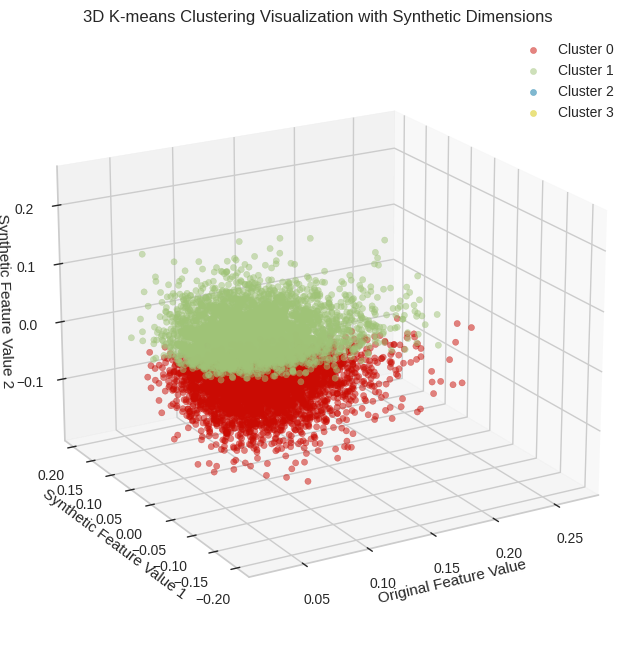

In [327]:
synthetic_dimension_1 = np.random.normal(0, 0.05, size=X_transformed_Text.shape)
synthetic_dimension_2 = np.random.normal(0, 0.05, size=X_transformed_Text.shape)
x_augmented_3d = np.hstack((X_transformed_Text, synthetic_dimension_1.reshape(-1, 1), synthetic_dimension_2.reshape(-1, 1)))

# Re-run K-means clustering on the augmented data
kmeans_3d = KMeans(n_clusters=2, init='k-means++', random_state=0)
labels_3d = kmeans_3d.fit_predict(x_augmented_3d)

# Plotting the results in a 3D scatter plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_augmented_3d[labels_3d == i, 0], x_augmented_3d[labels_3d == i, 1], x_augmented_3d[labels_3d == i, 2], c=colors[i], label=f'Cluster {i}', alpha=0.5)

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('Original Feature Value')
ax.set_ylabel('Synthetic Feature Value 1')
ax.set_zlabel('Synthetic Feature Value 2')
plt.legend()
plt.title('3D K-means Clustering Visualization with Synthetic Dimensions')
plt.show()

In [328]:
dataset['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [329]:
# Visualizing evaluation Metric Score chart
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = dataset[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

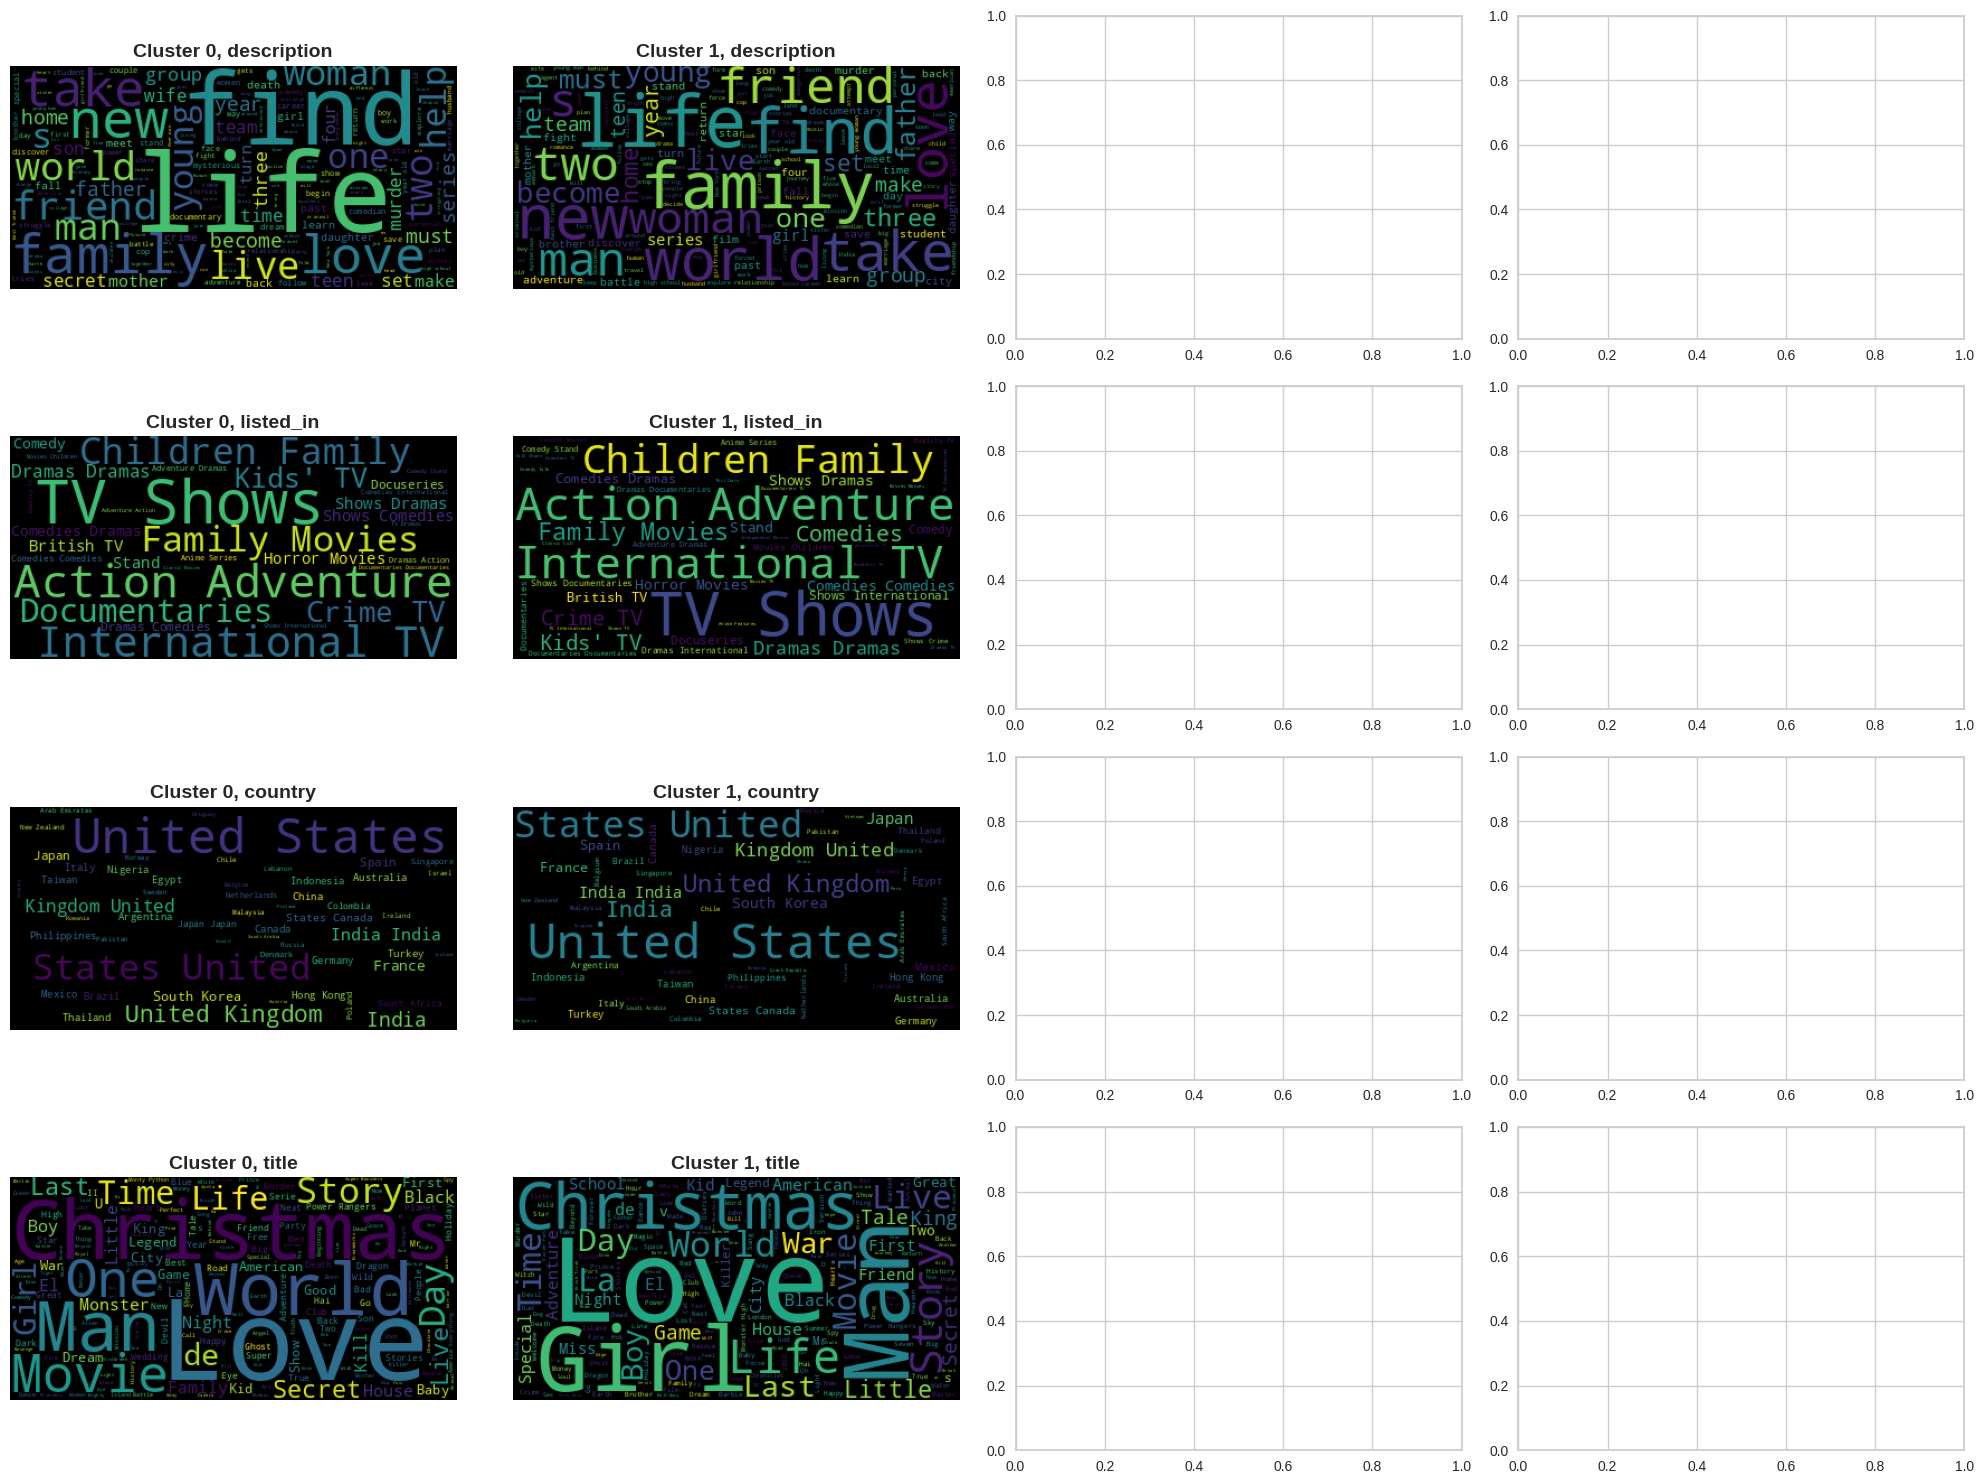

In [330]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [238]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Using cross-validation and hyperparameter tuning in K-means clustering involves a slightly different approach compared to supervised learning models due to the absence of labeled data.we don't need to use cross validation K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross validation is not required.

### ML Model - 2

Hierarchical clustering is  used to group similar objects or data points into clusters. Unlike K-means, hierarchical clustering doesn't require pre-specifying the number of clusters.

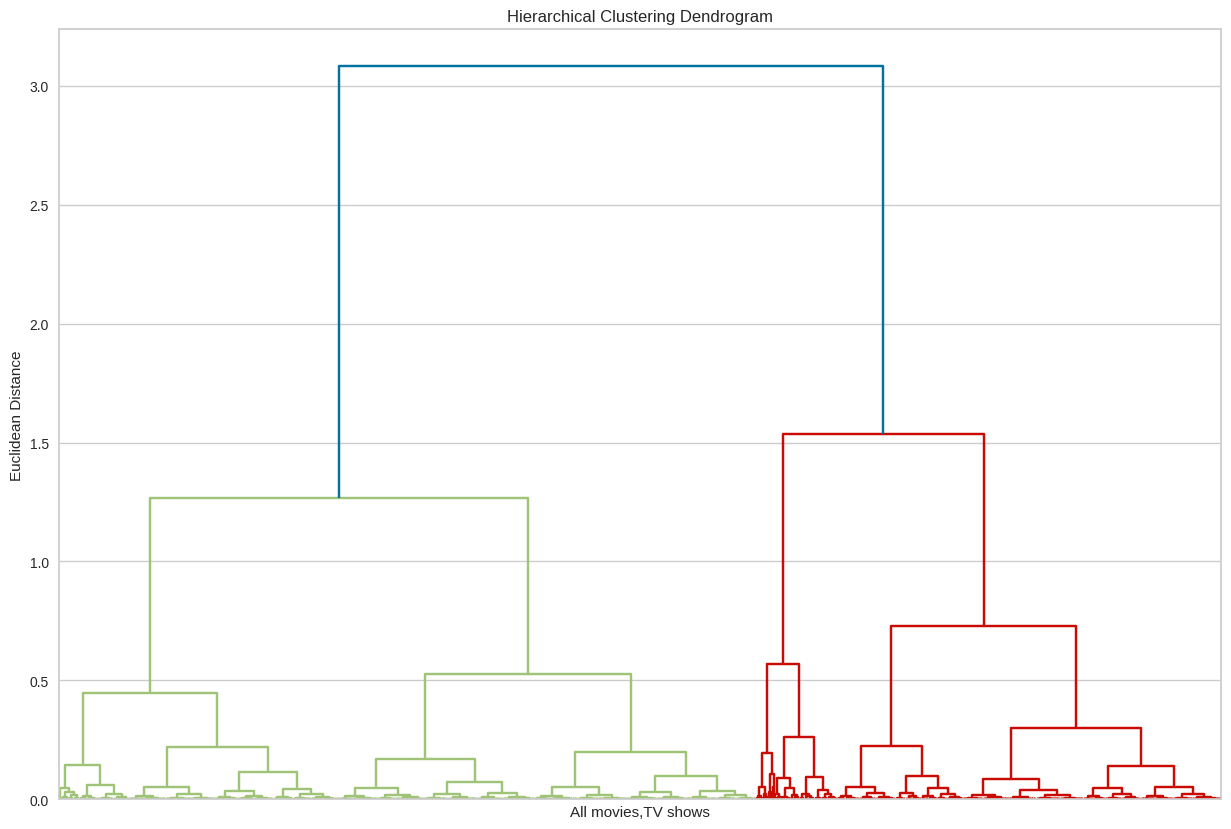

In [239]:
from scipy.cluster.hierarchy import linkage, dendrogram
Linkage_distance_ = linkage(X_transformed_Text, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All movies,TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(Linkage_distance_, no_labels = True)
plt.show()

In [240]:
from sklearn.cluster import AgglomerativeClustering
k_range = range(2, 10)
for k in k_range:
    agglomerative_model = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative_model.fit_predict(X_transformed_Text)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.001142
k=3, Silhouette score=-0.000909
k=4, Silhouette score=-0.000828
k=5, Silhouette score=-0.001032
k=6, Silhouette score=-0.002711
k=7, Silhouette score=-0.002709
k=8, Silhouette score=-0.002712
k=9, Silhouette score=-0.002739


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


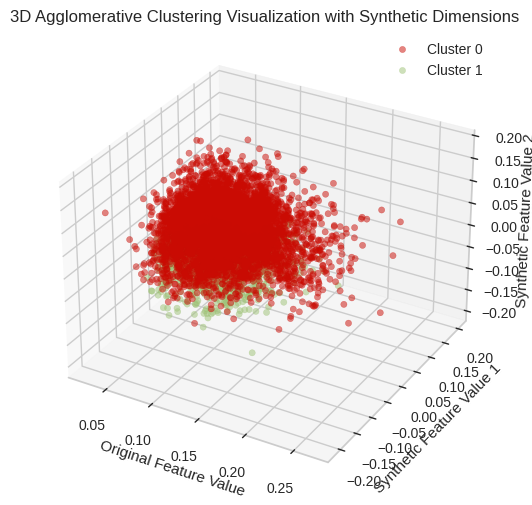

In [241]:
synthetic_dimension_1 = np.random.normal(0, 0.05, size = X_transformed_Text.shape)
synthetic_dimension_2 = np.random.normal(0, 0.05, size = X_transformed_Text.shape)
x_augmented_3d = np.hstack((X_transformed_Text, synthetic_dimension_1.reshape(-1, 1), synthetic_dimension_2.reshape(-1, 1)))

Model_3d = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_3d = Model_3d.fit_predict(x_augmented_3d)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(2):
    ax.scatter(x_augmented_3d[labels_3d == i, 0], x_augmented_3d[labels_3d == i, 1], x_augmented_3d[labels_3d == i, 2], c=colors[i], label=f'Cluster {i}', alpha=0.5)

ax.set_xlabel('Original Feature Value')
ax.set_ylabel('Synthetic Feature Value 1')
ax.set_zlabel('Synthetic Feature Value 2')
plt.legend()
plt.title('3D Agglomerative Clustering Visualization with Synthetic Dimensions')
plt.show()

In [242]:
dataset['agglomerative_cluster'] = Model_3d.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [243]:
# Visualizing evaluation Metric Score chart
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = dataset[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

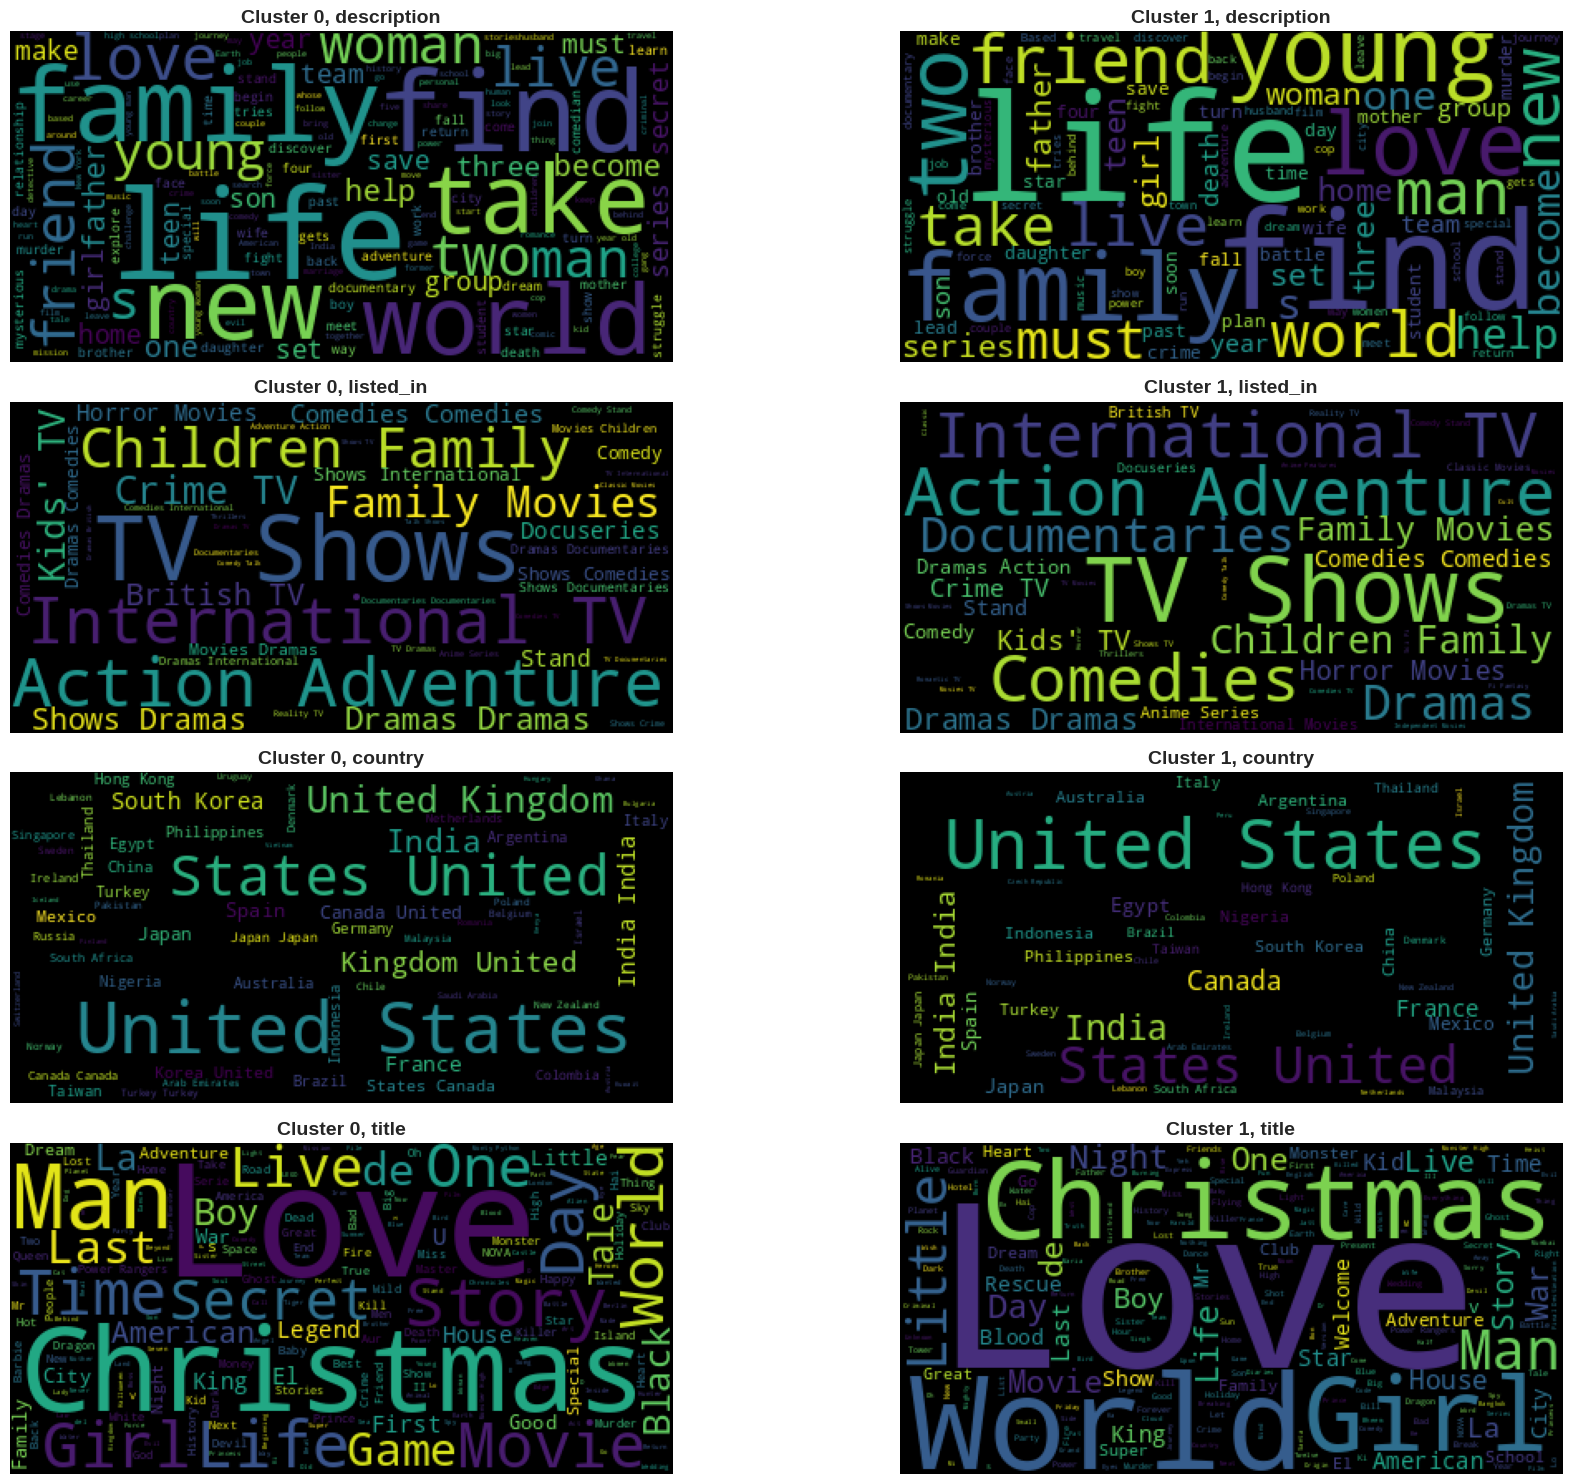

In [244]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [245]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Cross validation is not required.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross validation is not required.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used Agglomerative (Bottom-Up) Hierarchical Clustering.cluster 2 giving me the best Silhouette score.

### ML Model - 3

In [246]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dataset['tokenized'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=dataset):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table


In [247]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [248]:
# Visualizing evaluation Metric Score chart
recommend_content('Kuch Kuch Hota Hai')

Recommendation  Similarity_score(0-1)
0                           Kabhi Khushi Kabhie Gham                 0.3897
1                                             Judwaa                 0.2663
2                                      Hello Brother                 0.2610
3                                            Chaahat                 0.2131
4                                      Chalte Chalte                 0.2110
5                                          Kya Kehna                 0.2096
6                                             Paheli                 0.2048
7                                Hum Aapke Hain Koun                 0.2006
8                                      Kal Ho Naa Ho                 0.1943
9  My Next Guest with David Letterman and Shah Ru...                 0.1871

In [249]:
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2719
1                                          Kya Kehna                 0.2192
2  My Next Guest with David Letterman and Shah Ru...                 0.2166
3                              Together For Eternity                 0.1955
4                                 Kuch Kuch Hota Hai                 0.1943
5                                    Chashme Baddoor                 0.1881
6                               Kabhi Haan Kabhi Naa                 0.1807
7                           Kabhi Khushi Kabhie Gham                 0.1780
8                             Kabhi Alvida Naa Kehna                 0.1752
9                                    Chashme Buddoor                 0.1748

In [250]:
recommend_content('Zindagi Gulzar Hai')

Recommendation  Similarity_score(0-1)
0  7 Din Mohabbat In                 0.2059
1      Chupan Chupai                 0.1725
2           Humsafar                 0.1429
3     Ho Mann Jahaan                 0.1269
4     Sadqay Tumhare                 0.1062
5          Balu Mahi                 0.1059
6              Virsa                 0.0986
7               Cake                 0.0981
8   Teefa in Trouble                 0.0978
9          Wrong No.                 0.0892

#### 2. Cross- Validation & Hyperparameter Tuning

In [251]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Cross validation is not required.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Cross validation is not required.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- Silhouette score is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.

- Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would like to choose K-means as my final model because it yielded the best Silhouette Score. The model successfully clustered similar movies and TV shows based on their shared attributes, enabling us to provide better recommendations to our users. Additionally, K-means clustering was relatively easy to implement and maintain, making it a practical choice for our project

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

"In this project, we utilized the K-Means clustering algorithm. K-Means operates iteratively, clustering data points by minimizing the sum of squared distances between the data points and their assigned cluster centroids. This method partitions the data based on similarity and is particularly effective for numerical features

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [252]:
# Save the File
import pickle
filename='NETFLIX MOVIES AND TV SHOWS CLUSTERING.pkl'

# serialize process (wb=write byte)
pickle.dump(kmean_,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [253]:
# Load the File and predict unseen data.
kmeans_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data
kmeans_model.predict(X_transformed_Text)

array([12,  7,  7, ..., 11, 12,  4], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- Netflix boasts a larger collection of movies compared to TV shows within its platform.
- Dramas stand as the predominant genre in Netflix's content library, closely followed by Comedies and Documentaries.
- Since its inception in 2008, Netflix has consistently expanded its content library, showcasing a steady growth trajectory.
- The United States leads in producing content available on Netflix, followed by India and the United Kingdom.
- Employed robust techniques to handle missing data in essential columns like director, cast, country, and rating, ensuring a pristine dataset for analysis.
Explored advanced dimensionality reduction methods like Principal Component Analysis (PCA) to effectively condense features while retaining substantial data variance.
- Utilized clustering algorithms like k-means and hierarchical clustering to categorize movies and TV shows based on their unique features.
Determined the optimal number of clusters that maximize the silhouette score, unveiling deeper insights into inherent patterns and similarities in the dataset.
- Emphasized the business implications of the model, highlighting its potential to revolutionize content categorization, enhance user experience through personalized recommendations, and facilitate targeted marketing strategies for Netflix's benefit.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***